# Import Packages for EDA

We chose the following packages to conduct our EDA.

In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
import os
import yellowbrick 

from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,0.564000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,0.581667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,0.816000


# Phase 3 Exploratory Data Analysis

In [4]:
#investigate data
df.describe()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
count,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,2.891000e+04,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000,28910.000000
mean,16034.003909,0.116361,0.103217,0.098997,0.095572,0.090937,0.080111,0.076202,0.073677,0.065963,0.070391,0.062193,0.035005,0.031373,7.084105e+05,2.846489,0.703840,255.947181,0.386821,0.580837,0.175787,0.454687,-71.594569,0.095918,0.427430,0.290764,4.869872,1.756416,4.237323,83.677274,64.182359,457.443341,701.139744,964.222172,249.594085,263.082428,521.900380,900.696714,179.239364,1234.993843,0.457645
std,9509.981400,0.320663,0.304247,0.298663,0.294009,0.287525,0.271469,0.265326,0.261249,0.248222,0.255809,0.241510,0.183796,0.174327,5.588336e+05,1.596837,0.456571,13.310705,0.487031,0.493431,0.498177,0.497951,49.616924,0.294484,0.494714,0.468667,3.514445,0.736160,2.818201,40.169579,130.007392,612.933600,970.164622,1366.002456,414.788441,458.287297,708.714717,1266.119737,307.515264,1730.345325,0.342884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.733000e+03,0.000000,0.000000,234.000000,0.000000,0.000000,0.000000,0.000000,-322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7775.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.021358e+05,1.000000,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,-103.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,60.000000,0.000000,41.000000,63.000000,73.000000,0.000000,0.000000,47.000000,72.000000,0.000000,88.000000,0.051613
50%,15656.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.864735e+05,3.000000,1.000000,262.000000,0.000000,1.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,0.000000,4.000000,2.000000,4.000000,60.000000,15.000000,272.000000,389.000000,491.500000,92.000000,63.000000,304.000000,471.000000,55.000000,611.000000,0.532910
75%,24427.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.444265e+05,5.000000,1.000000,268.000000,1.000000,1.000000,0.000000,1.000000,-30.000000,0.000000,1.000000,1.000000,8.000000,2.000000,7.000000,120.000000,74.000000,617.000000,917.000000,1265.750000,314.000000,342.000000,694.000000,1187.000000,223.750000,1654.000000,0.775000
max,32587.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.698591e+06,5.000000,1.000000,269.000000,1.000000,1.000000,6.000000,1.000000,167.000000,1.000000,1.000000,2.000000,12.000000,4.000000,9.000000,655.000000,3731.000000,10149.000000,13086.000000,18713.000000,6739.000000,6626.000000,11236.000000,17481.000000,5613.000000,24139.000000,1.000000


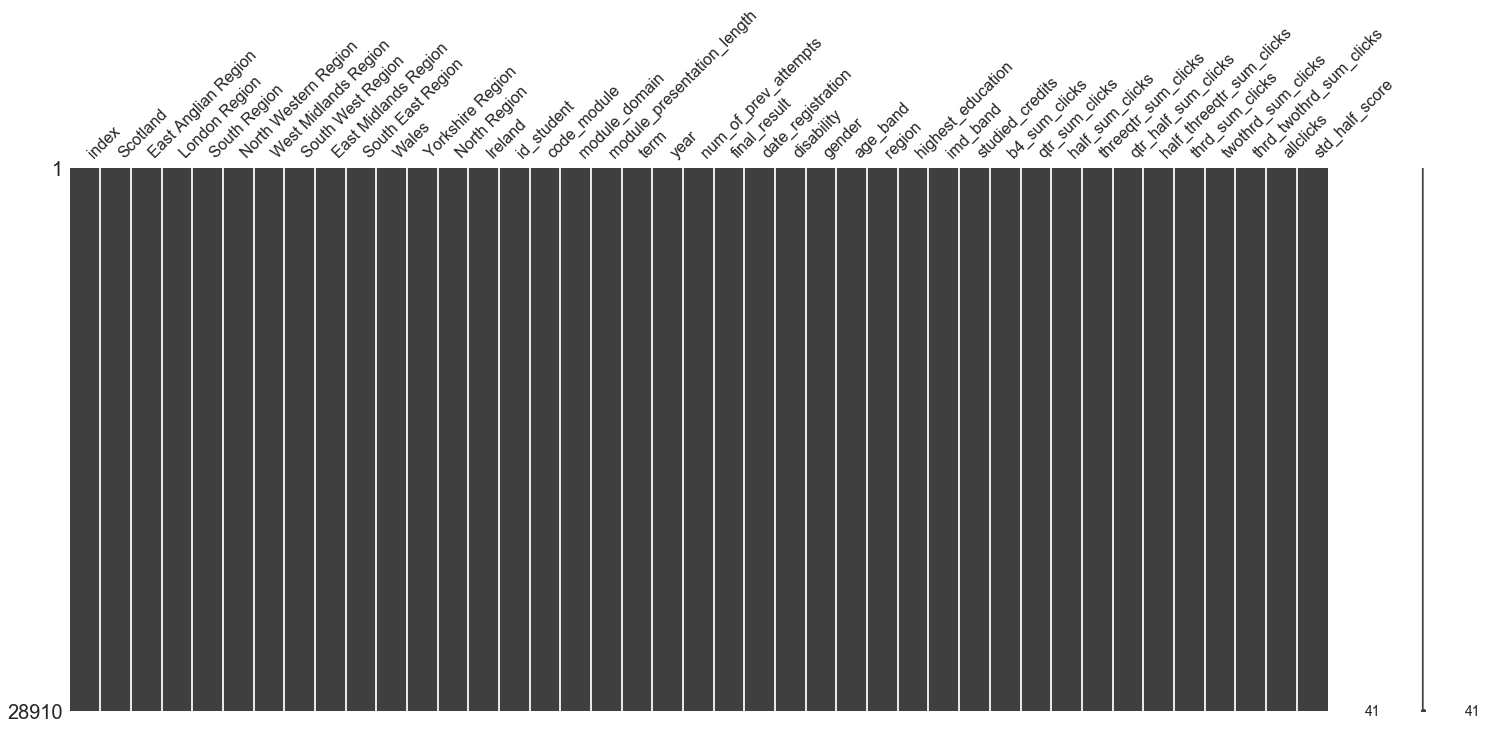

In [5]:
#examine missing values in original dataset called analysisDataset
mn.matrix(df)

# Exploratory Data Analysis

In [6]:
#investigate data types of all the files
df.dtypes

index                           int64
Scotland                        int64
East Anglian Region             int64
London Region                   int64
South Region                    int64
North Western Region            int64
West Midlands Region            int64
South West Region               int64
East Midlands Region            int64
South East Region               int64
Wales                           int64
Yorkshire Region                int64
North Region                    int64
Ireland                         int64
id_student                      int64
code_module                     int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region      

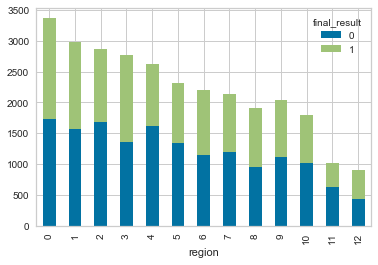

In [7]:
#check pass and fail ratio for students in diffent regions
df.groupby(['region','final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [41]:
df["id_student"].nunique()

25323

NameError: name 'ax' is not defined

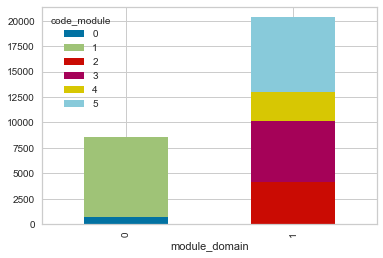

In [24]:
#check out layout of classes
df.groupby(['module_domain','code_module']).size().unstack().plot(kind='bar',stacked=True)

plt.savefig('module_domain.png')
plt.show()

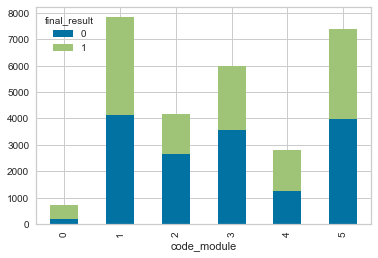

In [36]:
#check out layout of classes
df.groupby(['code_module','final_result']).size().unstack().plot(kind='bar',stacked=True)

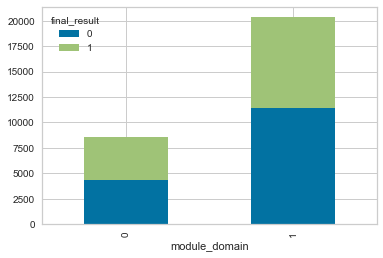

In [37]:
#check out layout of classes
df.groupby(['module_domain','final_result']).size().unstack().plot(kind='bar',stacked=True)

In [20]:
%pwd

'/Users/lisaschreiber/Desktop'

In [17]:
module = ({"module_domain": ["Social Science","STEM"],
                  "class": ["AAA", "BBB",
                            "CCC", "DDD",
                            "EEE", "FFF"]})
#check out layout of classes
module.groupby(['module_domain','code_module']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
fig.savefig('module_domain.png')

AttributeError: 'dict' object has no attribute 'groupby'

In [ ]:
df.groupby(['code_module','module_domain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='gender', height=4, aspect=.75)
g = g.map(sns.boxplot, 'final_result', 'half_sum_clicks')

In [ ]:
g = sns.FacetGrid(df, col='highest_education', height=4, aspect=.75)
g = g.map(sns.boxplot, 'final_result', 'half_sum_clicks')

In [ ]:
g = sns.FacetGrid(df, col='module_domain', height=4, aspect=.75)
g = g.map(sns.boxplot, 'final_result', 'half_sum_clicks')

In [ ]:
g = sns.FacetGrid(df, col='region', height=4, aspect=.3)
g = g.map(sns.boxplot, 'final_result', 'half_sum_clicks')

In [ ]:
#check out education levels by each region
#df['region', 'highest_education'].counts()
df.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True)
plt.show() 

In [ ]:
#check out counts for gender by each region
df.groupby(['region','gender'])['gender'].count()

In [ ]:
#check out gender by each region
#df['region', 'highest_education'].counts()
df.groupby(['region','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#investigate pass rates based on gender
df.groupby(['gender', 'final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#investigate pass rates based on poverty indicator index
df.groupby(['imd_band', 'final_result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#Pulling all Column Names/Feature Labels
df.columns

In [ ]:
list(df)

In [ ]:
#creating a function to pull min and max values of allclicks column and view associated features unique to a student
def min_max_values(col):
    ''' the function takes the colum name as the argument
        and returns the top & bottom observation in that dataframe
    '''
    top = df[col].idxmax()
    top_obs = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bot_obs = pd.DataFrame(df.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs

In [ ]:
min_max_values('half_sum_clicks')

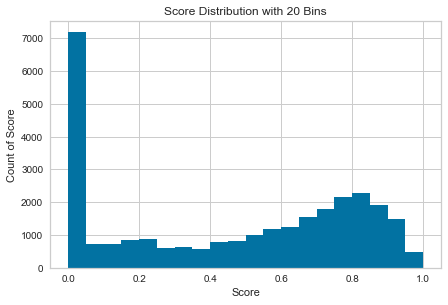

In [38]:
#create bins for score distribution

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['std_half_score'], bins=20, range=(df['std_half_score'].min(),df['std_half_score'].max()))
plt.title('Score Distribution with 20 Bins')
plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

In [ ]:
#count the number of unique student ids
df['id_student'].count()

In [ ]:
df['code_module'].value_counts()

In [ ]:
df.head()

In [ ]:
#count the number of semesters
df.groupby(['year', 'term', 'module_domain'])['id_student'].count()

In [ ]:
#count of null values in chart
df.isnull().sum()

In [ ]:
#distribution of gender based on course genre
df.groupby(['module_domain','gender'])['gender'].count()

In [ ]:
df.groupby(['gender', 'module_domain'])['module_domain'].count()

In [ ]:
df.groupby(['gender', 'module_domain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
df.groupby(['region', 'gender']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [ ]:
#semester by gender, the first year is more gender blanaced than the second year
df.groupby(['term','gender']).size().unstack().plot(kind='bar')
plt.show()

In [ ]:
#number count of the graph above
df.groupby(['year','term','gender'])['gender'].count()

In [ ]:
df['term'].value_counts()

In [ ]:
#class by gender
df.groupby(['year','term', 'gender']).size().unstack().plot(kind='bar')
plt.show()

In [ ]:
#grouping education by gender
df.groupby(['highest_education', 'gender']).size().unstack().plot(kind='bar')
plt.show()

# Scatter Matrix for All the Features in Our Finalized Dataset

In [ ]:
X = df[df.columns.values.tolist()].sample(frac=0.20, replace=False, random_state=1)
#20% of the data for the scatter matrix
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
sns.set_palette("colorblind")

g = sns.pairplot(df, hue="final_result")
plt.show()

In [ ]:
plt.style.use('ggplot')
df.boxplot("final_result","region", figsize=(20,5))

In [26]:
list(df)

['index',
 'Scotland',
 'East Anglian Region',
 'London Region',
 'South Region',
 'North Western Region',
 'West Midlands Region',
 'South West Region',
 'East Midlands Region',
 'South East Region',
 'Wales',
 'Yorkshire Region',
 'North Region',
 'Ireland',
 'id_student',
 'code_module',
 'module_domain',
 'module_presentation_length',
 'term',
 'year',
 'num_of_prev_attempts',
 'final_result',
 'date_registration',
 'disability',
 'gender',
 'age_band',
 'region',
 'highest_education',
 'imd_band',
 'studied_credits',
 'b4_sum_clicks',
 'qtr_sum_clicks',
 'half_sum_clicks',
 'threeqtr_sum_clicks',
 'qtr_half_sum_clicks',
 'half_threeqtr_sum_clicks',
 'thrd_sum_clicks',
 'twothrd_sum_clicks',
 'thrd_twothrd_sum_clicks',
 'allclicks',
 'std_half_score']

In [29]:
features_list = df[['id_student',
     'code_module',
     'module_domain',
     'module_presentation_length',
     'term',
     'year',
     'num_of_prev_attempts',
     'final_result',
     'date_registration',
     'disability',
     'gender',
     'age_band',
     'region',
     'highest_education',
     'imd_band',
     'studied_credits',
     'b4_sum_clicks',
     'qtr_sum_clicks',
     'half_sum_clicks',
     'threeqtr_sum_clicks',
     'qtr_half_sum_clicks',
     'half_threeqtr_sum_clicks',
     'thrd_sum_clicks',
     'twothrd_sum_clicks',
     'thrd_twothrd_sum_clicks',
     'allclicks',
     'std_half_score']]

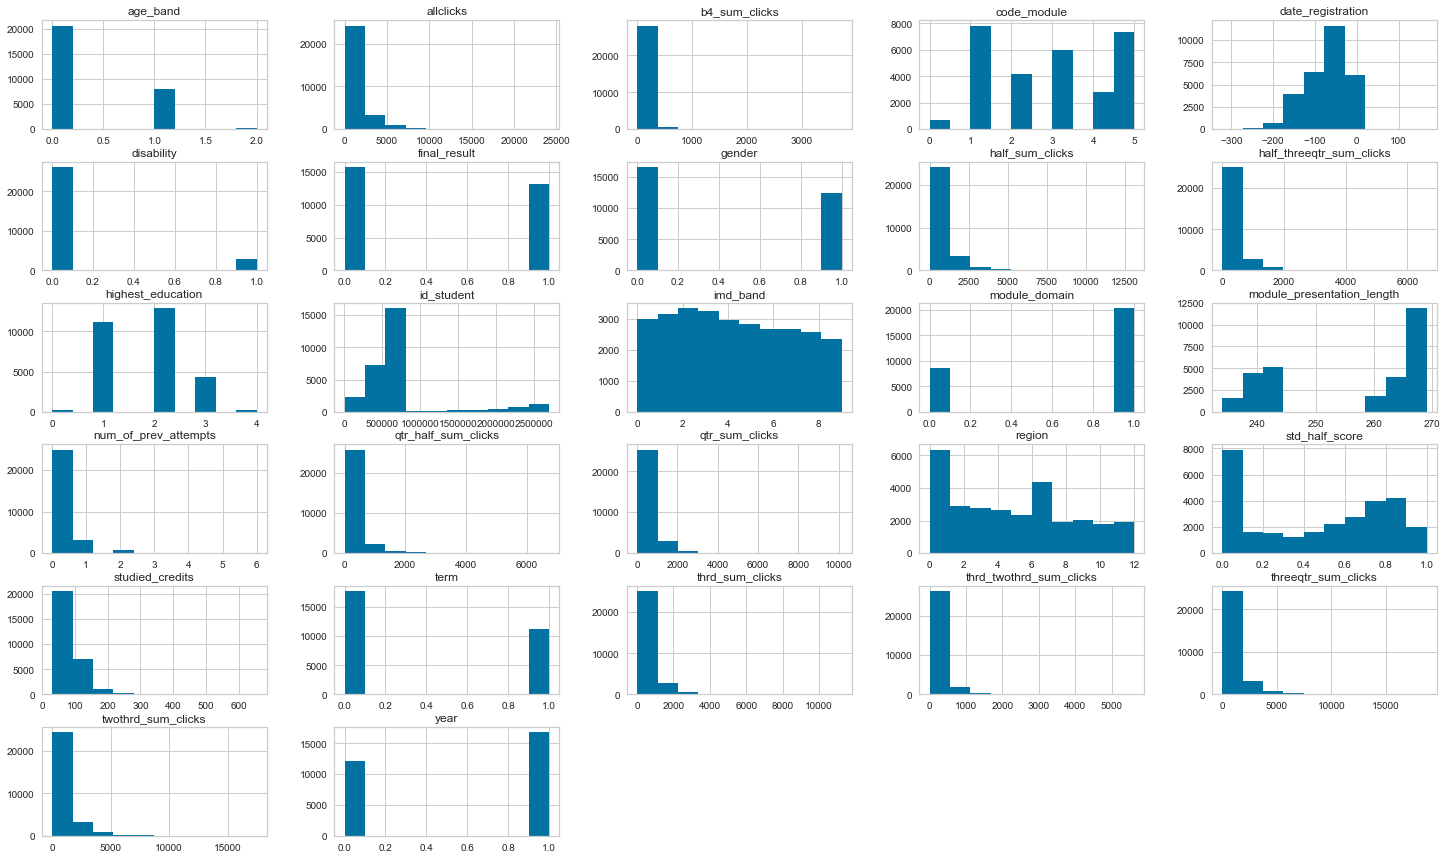

In [33]:
features_list.hist(figsize=(25,15)) # Histogram for all features
plt.savefig('feature_histogram.png')

In [ ]:
df.head()

In [ ]:
list(df)

In [ ]:
df_test.head()

In [ ]:
scatter_matrix(df_test, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
ax = df.boxplot("studied_credits","region", figsize=(20,5))

In [ ]:
disconnectDB()